# Function Transformer


Function transformers are the type of feature transformation technique that uses a particular function to 
  transform the data to the normal distribution
1. Log Transform
2. Square Transform
3. Square Root Transform
4. Reciprocal Transform
5. Custom Transform

#### Step-1 Analyse dataset & Select Dataset
#### Step-2 Remove Outliers using IQR
#### Step-3 Function Transformer by "log Transform (log1p)"
#### Step-4 Function Transformer by "Square Transform (lambda x : x**2)"

# Step-1 Analyse dataset & Select Dataset

In [98]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
dataset = pd.read_csv(r"C:\Users\jites\OneDrive\Desktop\archive\loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [101]:
dataset.shape

(614, 13)

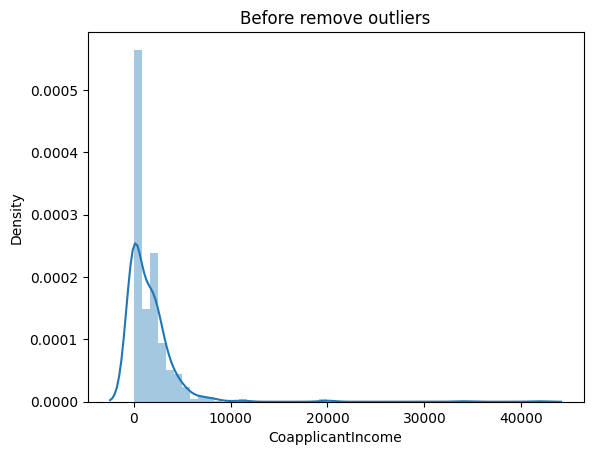

In [102]:
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before remove outliers")
plt.show()

# Step-2 Remove Outliers using IQR

In [103]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

In [104]:
iqr = q3-q1
iqr

np.float64(2297.25)

In [105]:
min_range = q1 -(1.5*iqr)
max_range = q3 +(1.5*iqr)
min_range ,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [106]:
dataset= dataset[dataset["CoapplicantIncome"]<=max_range]

In [107]:
dataset.shape

(596, 13)

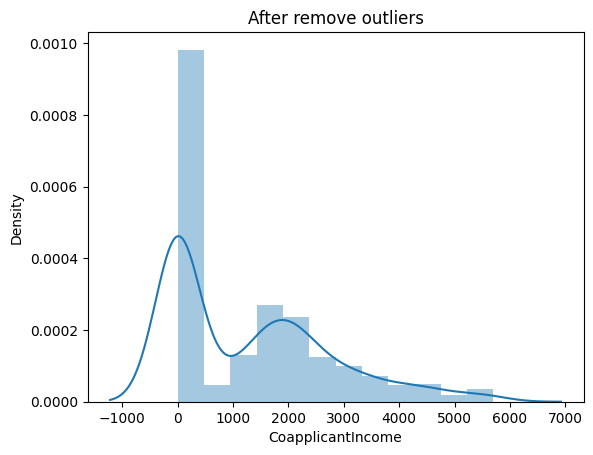

In [108]:
sns.distplot(dataset["CoapplicantIncome"])
plt.title("After remove outliers")
plt.show()

# Step-3 Function Transformer by "log Transform (log1p)"

In [109]:
from sklearn.preprocessing import FunctionTransformer

In [110]:
funt = FunctionTransformer(func=np.log1p)
funt.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_ft"] =funt.transform(dataset[["CoapplicantIncome"]])

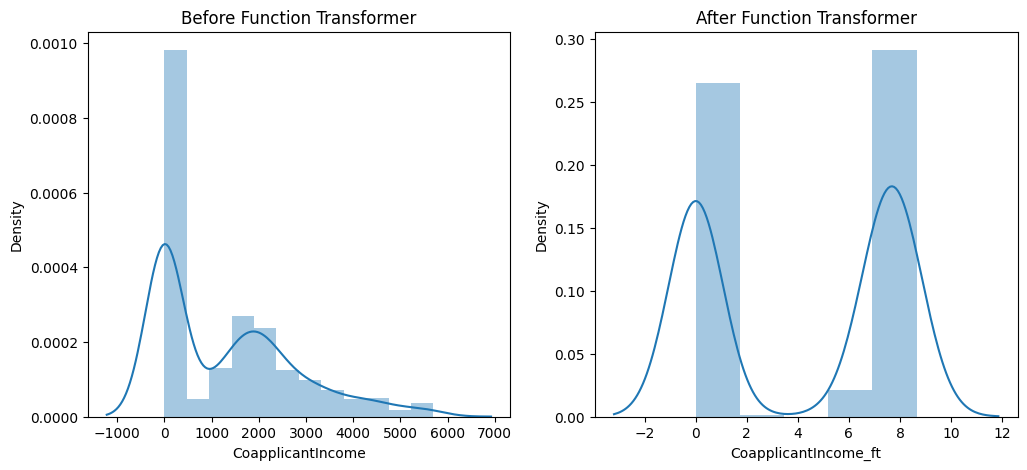

In [111]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before Function Transformer")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_ft"])
plt.title("After Function Transformer")
plt.show()

# Step-4 Function Transformer by "Square Transform (lambda x : x**2)"

In [112]:
funt1 = FunctionTransformer(func= lambda x : x**2)
funt1.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_ft1"] =funt1.transform(dataset[["CoapplicantIncome"]])

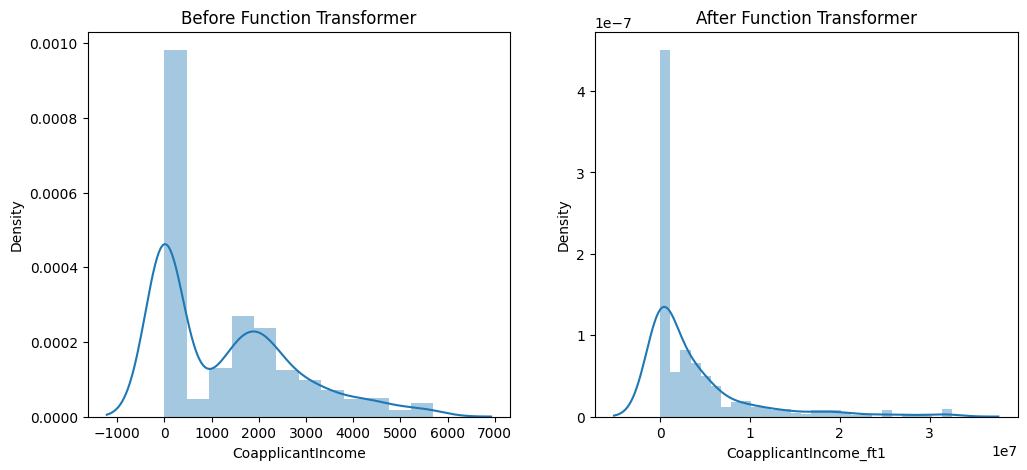

In [113]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before Function Transformer")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_ft1"])
plt.title("After Function Transformer")
plt.show()